Problem Statement.

Health Insurance Lead Prediction Your Client FinMan is a financial services company that provides various financial services like loan, investment funds, insurance etc. to its customers. FinMan wishes to cross-sell health insurance to the existing customers who may or may not hold insurance policies with the company. The company recommend health insurance to it's customers based on their profile once these customers land on the website. Customers might browse the recommended health insurance policy and consequently fill up a form to apply. When these customers fill-up the form, their Response towards the policy is considered positive and they are classified as a lead.

Once these leads are acquired, the sales advisors approach them to convert and thus the company can sell proposed health insurance to these leads in a more efficient manner.

Now the company needs your help in building a model to predict whether the person will be interested in their proposed Health plan/policy given the information about:

Demographics (city, age, region etc.) Information regarding holding policies of the customer Recommended Policy Information



In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 20)

In [30]:
dataset = pd.read_csv(r"E:\Nikhil\Job-A-Thon\train.csv")
print(dataset.shape)
dataset.head()

(50882, 14)


,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


## Drop ID Column

In [33]:
dataset = dataset.drop({'ID'},axis=1)

# Variable Identification

In [4]:
dataset.describe()

,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City_Code                50882 non-null  object 
 1   Region_Code              50882 non-null  int64  
 2   Accomodation_Type        50882 non-null  object 
 3   Reco_Insurance_Type      50882 non-null  object 
 4   Upper_Age                50882 non-null  int64  
 5   Lower_Age                50882 non-null  int64  
 6   Is_Spouse                50882 non-null  object 
 7   Health Indicator         39191 non-null  object 
 8   Holding_Policy_Duration  30631 non-null  object 
 9   Holding_Policy_Type      30631 non-null  float64
 10  Reco_Policy_Cat          50882 non-null  int64  
 11  Reco_Policy_Premium      50882 non-null  float64
 12  Response                 50882 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 5.0+ MB


# EDA

In [43]:
dataset.isnull().sum()

Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

## Impute Nulls
### For Holding policy duration

In [36]:
dataset.Holding_Policy_Duration.replace({'14+':15.0},inplace=True)

In [37]:
dataset.Holding_Policy_Duration.replace({np.nan:15.0},inplace=True)

In [38]:
dataset.Holding_Policy_Duration.value_counts()

15.0    24586
1.0      4499
2.0      4260
3.0      3586
4.0      2771
5.0      2362
6.0      1894
7.0      1645
8.0      1316
9.0      1114
10.0      813
11.0      546
12.0      513
13.0      511
14.0      466
Name: Holding_Policy_Duration, dtype: int64

## Impute Nulls

### For health Indicator

In [39]:
dataset['Health Indicator'] = dataset['Health Indicator'].fillna('X1')

### Replace the Values of Health Indicator

In [40]:
dataset['Health Indicator'] = dataset['Health Indicator'].replace({"X1":1,"X2":2,"X3":3,"X4":4,"X5":5,"X6":6,"X7":7,"X8":8,"X9":9})

### Holding policy type

In [41]:
dataset.Holding_Policy_Type.value_counts()

3.0    13279
1.0     8173
2.0     5005
4.0     4174
Name: Holding_Policy_Type, dtype: int64

In [42]:
dataset.Holding_Policy_Type = dataset.Holding_Policy_Type.fillna(3.0)

### Convert The Data Types

In [48]:
dataset.Holding_Policy_Duration = dataset.Holding_Policy_Duration.astype('int64')

In [49]:
dataset.Holding_Policy_Type = dataset.Holding_Policy_Type.astype('int64')

In [50]:
dataset['Health Indicator'] = dataset['Health Indicator'].astype('int64')

## Check Outliers

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City_Code                50882 non-null  object 
 1   Region_Code              50882 non-null  int64  
 2   Accomodation_Type        50882 non-null  object 
 3   Reco_Insurance_Type      50882 non-null  object 
 4   Upper_Age                50882 non-null  int64  
 5   Lower_Age                50882 non-null  int64  
 6   Is_Spouse                50882 non-null  object 
 7   Health Indicator         50882 non-null  int64  
 8   Holding_Policy_Duration  50882 non-null  int64  
 9   Holding_Policy_Type      50882 non-null  int64  
 10  Reco_Policy_Cat          50882 non-null  int64  
 11  Reco_Policy_Premium      50882 non-null  float64
 12  Response                 50882 non-null  int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 5.0+ MB


In [671]:
# plt.boxplot(dataset["Region_Code"])

# plt.show()

In [672]:
# plt.boxplot(dataset["Upper_Age"])

# plt.show()

In [673]:
# plt.boxplot(dataset["Lower_Age"])

# plt.show()

In [674]:
# plt.boxplot(dataset["Health Indicator"])

# plt.show()

In [675]:
# plt.boxplot(dataset["Holding_Policy_Duration"])

# plt.show()

In [676]:
# plt.boxplot(dataset["Holding_Policy_Type"])

# plt.show()

In [677]:
# plt.boxplot(dataset["Reco_Policy_Cat"])

# plt.show()

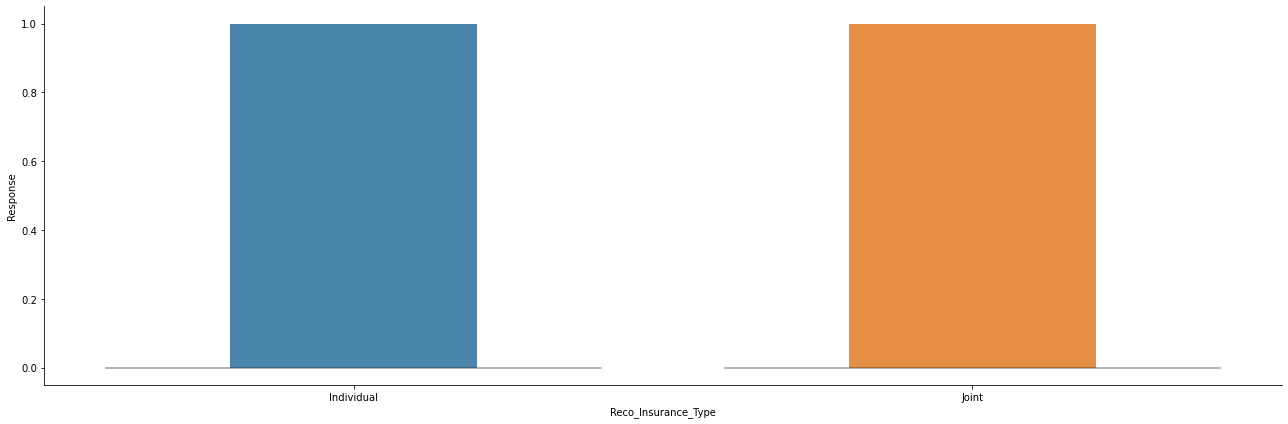

In [19]:
sns.catplot(y = "Response", x = "Reco_Insurance_Type", data = dataset.sort_values("Response", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

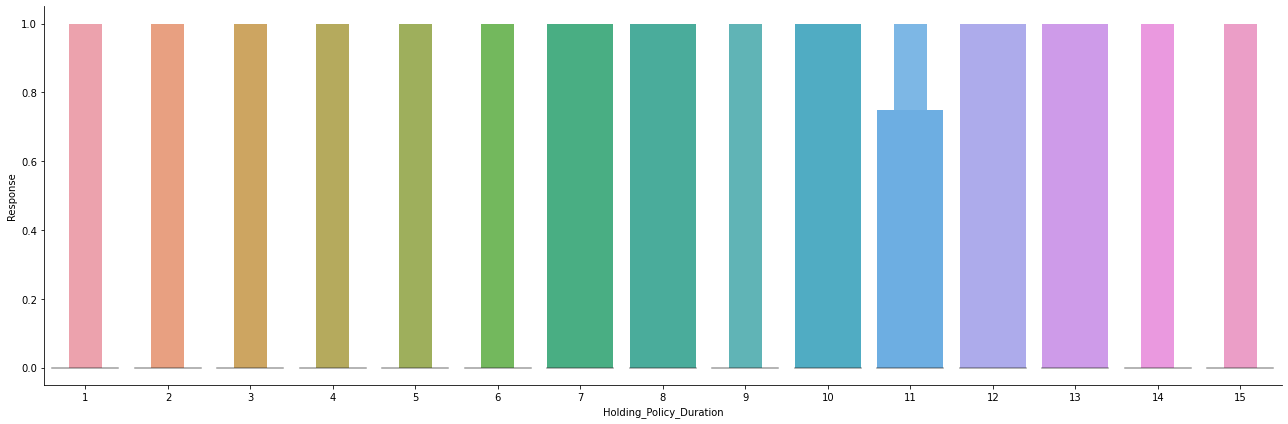

In [21]:
sns.catplot(y = "Response", x = "Holding_Policy_Duration", data = dataset.sort_values("Response", ascending = True), kind="boxen", height = 6, aspect = 3)
plt.show()

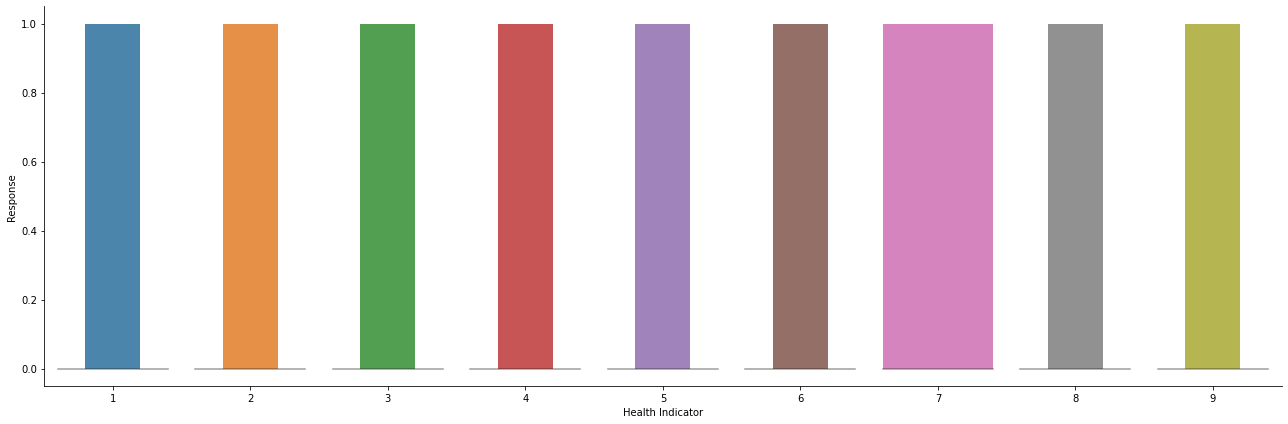

In [22]:
sns.catplot(y = "Response", x = "Health Indicator", data = dataset.sort_values("Response", ascending = True), kind="boxen", height = 6, aspect = 3)
plt.show()

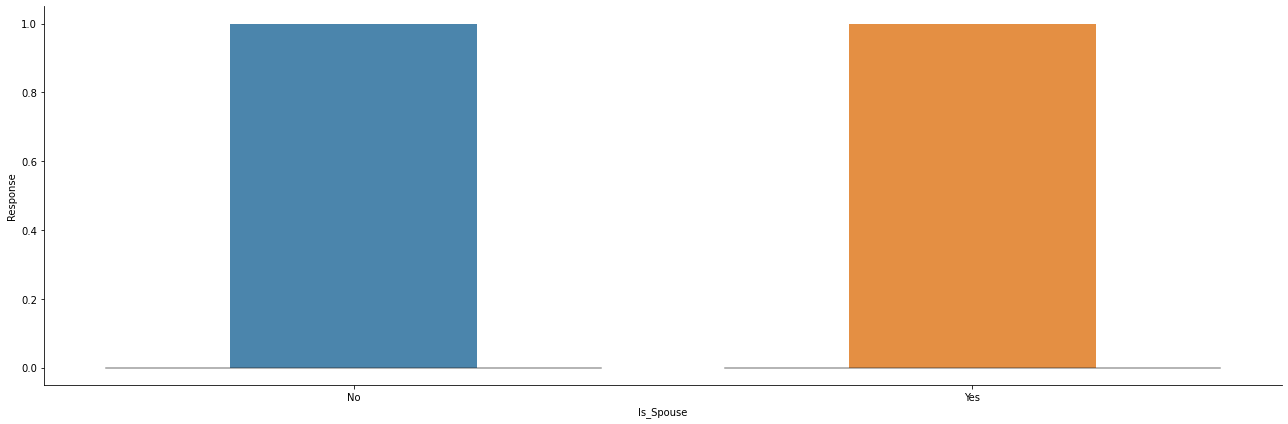

In [24]:
sns.catplot(y = "Response", x = "Is_Spouse", data = dataset.sort_values("Response", ascending = True), kind="boxen", height = 6, aspect = 3)
plt.show()

## Check The Skewness 

In [679]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


numeric_feats = dataset.dtypes[dataset.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = dataset[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats}) 
skewness.head(15)


Skew in numerical features: 



,Skew
Health Indicator,1.311
Response,1.218
Region_Code,0.798
Reco_Policy_Premium,0.782
Lower_Age,0.331
Upper_Age,0.217
Holding_Policy_Duration,-0.324
Holding_Policy_Type,-0.913
Reco_Policy_Cat,-0.928


## Check the Data Distribution

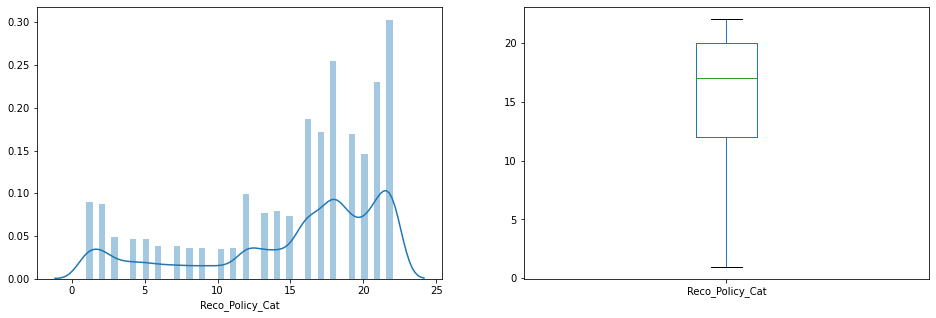

In [686]:
plt.figure(1)
plt.subplot(121)
sns.distplot(dataset["Reco_Policy_Cat"]);

plt.subplot(122)
dataset["Reco_Policy_Cat"].plot.box(figsize=(16,5))
plt.show()

In [683]:
print(dataset['Health Indicator'].quantile(0.95))

4.0


In [684]:
print(dataset['Health Indicator'].quantile(0.10))

1.0


## Check The Co-Relation Using Heatmap

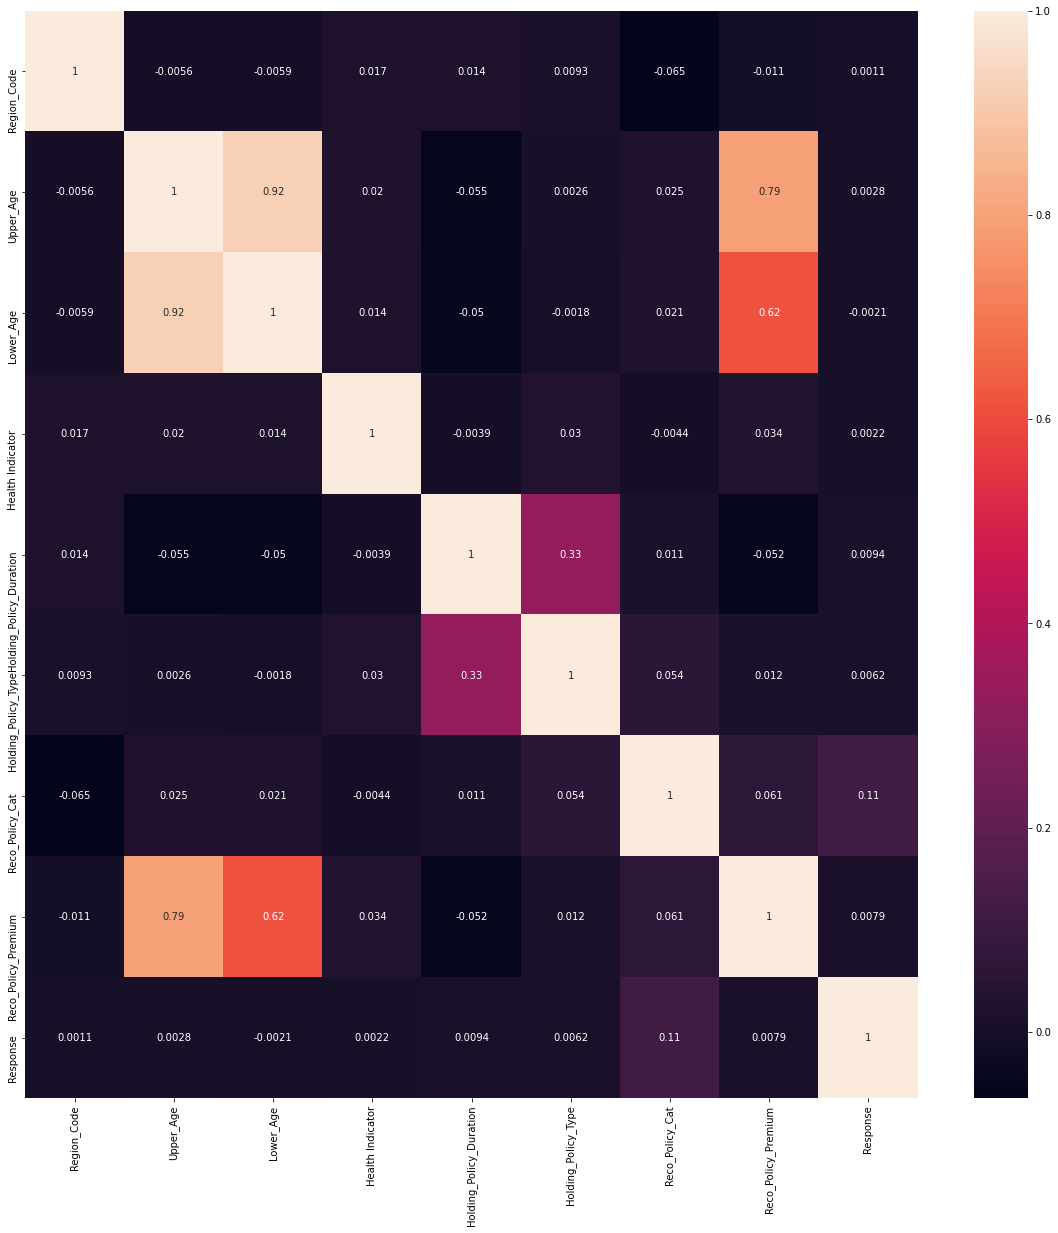

In [687]:
plt.figure(figsize=(20,20))
sns.heatmap(dataset.corr(),annot= True)

On the above graph clearly shows the multicollinearity occurs between Upper_age and 
Lower_age So i m going to drop lower_age because it is also negatively co-related with my target variable

In [688]:
dataset = dataset.drop({'Upper_Age'},axis=1)

## Apply One Hot EnCoding

In [574]:
# Accomodation_dummy = pd.get_dummies(dataset['Accomodation_Type'])
# Insurance_type_dummy = pd.get_dummies(dataset['Reco_Insurance_Type'])
# Is_spouse_dummy = pd.get_dummies(dataset['Is_Spouse'])

In [575]:
# dataset.drop(['Accomodation_Type','Reco_Insurance_Type','Is_Spouse'],inplace = True,axis=1)

In [576]:
# dataset = pd.concat([dataset,Accomodation_dummy,Insurance_type_dummy,Is_spouse_dummy],axis=1)

In [577]:
# dataset.head()

### Apply Label EnCoding

In [689]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [690]:
dataset[dataset.select_dtypes(include=['object']).columns] = dataset[dataset.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [691]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City_Code                50882 non-null  int32  
 1   Region_Code              50882 non-null  int64  
 2   Accomodation_Type        50882 non-null  int32  
 3   Reco_Insurance_Type      50882 non-null  int32  
 4   Lower_Age                50882 non-null  int64  
 5   Is_Spouse                50882 non-null  int32  
 6   Health Indicator         50882 non-null  int64  
 7   Holding_Policy_Duration  50882 non-null  int64  
 8   Holding_Policy_Type      50882 non-null  int64  
 9   Reco_Policy_Cat          50882 non-null  int64  
 10  Reco_Policy_Premium      50882 non-null  float64
 11  Response                 50882 non-null  int64  
dtypes: float64(1), int32(4), int64(7)
memory usage: 3.9 MB


# Model Building

## Split the Data Into Train & Test

In [692]:
X = dataset.drop({'Response','Accomodation_Type'},axis=1)
X.head()

,City_Code,Region_Code,Reco_Insurance_Type,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,22,3213,0,36,0,1,15,3,22,11628.000
1,31,1117,1,22,0,2,15,3,22,30510.000
2,31,3732,0,32,0,1,1,1,19,7450.000
3,16,4378,1,48,0,1,15,3,19,17780.000
4,34,2190,0,44,0,2,3,1,16,10404.000


In [693]:
y = dataset.loc[: , 'Response']
y

0        0
1        0
2        1
3        0
4        0
        ..
50877    0
50878    0
50879    0
50880    1
50881    0
Name: Response, Length: 50882, dtype: int64

In [694]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y , test_size = .2,random_state=333)

## Logistics Regression

In [695]:
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [696]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [697]:
logm = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Response   No. Observations:                40705
Model:                            GLM   Df Residuals:                    40694
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -22129.
Date:                Sat, 27 Feb 2021   Deviance:                       44258.
Time:                        18:51:16   Pearson chi2:                 4.06e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.9477      0.066    -29.523      0.000      -2.077      -1.818
City_Code                   0.0016      0.001      1.602      0.109      -0.000       0.003
Region_Code              1.239e-05   8.26e-06      1.499      0.134   -3.81e-06    2.86e-05
Reco_Insurance_Type         0.1764      0.079      2.220      0.026       0.021       0.332
Lower_Age                   0.0009      0.001      0.767      0.443      -0.001       0.003
Is_Spouse                  -0.1024      0.069     -1.484      0.138      -0.238       0.033
Health Indicator            0.0076      0.008      0.908      0.364      -0.009       0.024
Holding_Policy_Duration     0.0037      0.002      1.695      0.090      -0.001       0.008
Holding_Policy_Type        -0.0146      0.015     -0.986      0.324      -0.044       0.014
Reco_Policy_Cat             0.0474      0.002     23.331      0.000       0.043       0.051
Reco_Policy_Premium     -4.187e-06   3.63e-06     -1.154      0.249   -1.13e-05    2.92e-06
===========================================================================================
"""

## Feature Selection

In [608]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np

In [609]:
from sklearn.feature_selection import RFE

In [612]:
X.shape

(50882, 11)

## Oversampling

In [698]:
# oversamlpling
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from pycm import ConfusionMatrix
from collections import Counter
from imblearn.combine import SMOTETomek

In [701]:
# Over sampling Technique
ost=RandomOverSampler()
X_train_ns,y_train_ns=ost.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 30940, 1: 9765})
The number of classes after fit Counter({0: 30940, 1: 30940})


## Model On Logistics Regression Oversampling

In [702]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(class_weight='balanced',solver = 'newton-cg')

mode1 = lg.fit(X_train_ns,y_train_ns)
THRESHOLD = 0.4
preds = np.where(mode1.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

C:\Users\lenovo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging

In [703]:
tab = confusion_matrix(preds, y_test)
print("Confusion Matrix:\n",tab)
# evaluate predictions
acc = (accuracy_score(y_test, preds))*100
print("\nAccuracy: %.2f%%\n" % acc)
print(classification_report(y_test,preds))
print("\n",ConfusionMatrix(np.array(y_test),preds))

Confusion Matrix:
 [[1402  218]
 [6331 2226]]

Accuracy: 35.65%

              precision    recall  f1-score   support

           0       0.87      0.18      0.30      7733
           1       0.26      0.91      0.40      2444

    accuracy                           0.36     10177
   macro avg       0.56      0.55      0.35     10177
weighted avg       0.72      0.36      0.32     10177


 Predict    0          1          
Actual
0          1402       6331       

1          218        2226       





Overall Statistics : 

95% CI                                                            (0.34718,0.3658)
ACC Macro                                                         0.35649
ARI                                                               -0.04934
AUNP                                                              0.54605
AUNU                                                              0.54605
Bangdiwala B                                                      0.20695
Bennett S     

## Random Forest

In [704]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 500,
 min_samples_split = 100,
 min_samples_leaf = 5,
 max_features = 'auto',
 max_depth = 30)

In [705]:
model2 = rf.fit(X_train_ns,y_train_ns)

In [706]:
pred2 = model2.predict(X_test)

In [707]:
tab2 = confusion_matrix(pred2,y_test)
print("Confusion matrix:\n",tab2)
# Evaluate Predictions
acc2 = (accuracy_score(y_test,pred2))*100
print("\nAccuracy: %.2f%%\n" % acc2)
print(classification_report(y_test,pred2))
print("\n",ConfusionMatrix(np.array(y_test),pred2))

Confusion matrix:
 [[5147 1201]
 [2586 1243]]

Accuracy: 62.79%

              precision    recall  f1-score   support

           0       0.81      0.67      0.73      7733
           1       0.32      0.51      0.40      2444

    accuracy                           0.63     10177
   macro avg       0.57      0.59      0.56     10177
weighted avg       0.69      0.63      0.65     10177


 Predict    0          1          
Actual
0          5147       2586       

1          1201       1243       





Overall Statistics : 

95% CI                                                            (0.6185,0.63728)
ACC Macro                                                         0.62789
ARI                                                               0.04963
AUNP                                                              0.58709
AUNU                                                              0.58709
Bangdiwala B                                                      0.47969
Bennett S      

## XGBoosting Classifier

In [708]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=8,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [709]:
model3 = xgb.fit(X_train_ns,y_train_ns)

C:\Users\lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:53:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [710]:
pred3 = model3.predict(X_test)

In [711]:
tab3 = confusion_matrix(pred3,y_test)
print("Confusion matrix:\n",tab3)
# Evaluate Predictions
acc3 = (accuracy_score(y_test,pred3))*100
print("\nAccuracy: %.2f%%\n" % acc3)
print(classification_report(y_test,pred3))
print("\n",ConfusionMatrix(np.array(y_test),pred3))

Confusion matrix:
 [[6448 1669]
 [1285  775]]

Accuracy: 70.97%

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      7733
           1       0.38      0.32      0.34      2444

    accuracy                           0.71     10177
   macro avg       0.59      0.58      0.58     10177
weighted avg       0.69      0.71      0.70     10177


 Predict    0          1          
Actual
0          6448       1285       

1          1669       775        





Overall Statistics : 

95% CI                                                            (0.70092,0.71856)
ACC Macro                                                         0.70974
ARI                                                               0.08874
AUNP                                                              0.57547
AUNU                                                              0.57547
Bangdiwala B                                                      0.62205
Bennett S     

## Adaboosting

In [712]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators = 25)

In [713]:
abc.fit(X_train_ns, y_train_ns)
print("Model fitted!!")

Model fitted!!


In [714]:
pred_adb = abc.predict(X_test)

In [715]:
tab4 = confusion_matrix(pred_adb,y_test)

In [716]:
print("Confusion Matrix:\n",tab4)
# evaluate predictions
acc4 = (accuracy_score(y_test, pred_adb))*100
print("\nAccuracy: %.2f%%\n" % acc4)
print(classification_report(y_test,pred_adb))
print("\n",ConfusionMatrix(np.array(y_test),pred_adb))

Confusion Matrix:
 [[3362  729]
 [4371 1715]]

Accuracy: 49.89%

              precision    recall  f1-score   support

           0       0.82      0.43      0.57      7733
           1       0.28      0.70      0.40      2444

    accuracy                           0.50     10177
   macro avg       0.55      0.57      0.49     10177
weighted avg       0.69      0.50      0.53     10177


 Predict    0          1          
Actual
0          3362       4371       

1          729        1715       





Overall Statistics : 

95% CI                                                            (0.48916,0.50858)
ACC Macro                                                         0.49887
ARI                                                               -0.01055
AUNP                                                              0.56824
AUNU                                                              0.56824
Bangdiwala B                                                      0.30626
Bennett S    

## Gradient Boosting

In [717]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

In [718]:
gbc.fit(X_train_ns,y_train_ns)
print("Model Fitted")

Model Fitted


In [719]:
pred_gbc = gbc.predict(X_test)

In [720]:
tab5 = confusion_matrix(pred_gbc,y_test)

In [721]:
print("Confusion Matrix:\n",tab5)
# evaluate predictions
acc5 = (accuracy_score(y_test, pred_gbc))*100
print("\nAccuracy: %.2f%%\n" % acc5)
print(classification_report(y_test,pred_gbc))
print("\n",ConfusionMatrix(np.array(y_test),pred_gbc))

Confusion Matrix:
 [[3966  824]
 [3767 1620]]

Accuracy: 54.89%

              precision    recall  f1-score   support

           0       0.83      0.51      0.63      7733
           1       0.30      0.66      0.41      2444

    accuracy                           0.55     10177
   macro avg       0.56      0.59      0.52     10177
weighted avg       0.70      0.55      0.58     10177


 Predict    0          1          
Actual
0          3966       3767       

1          824        1620       





Overall Statistics : 

95% CI                                                            (0.53922,0.55855)
ACC Macro                                                         0.54888
ARI                                                               0.00857
AUNP                                                              0.58786
AUNU                                                              0.58786
Bangdiwala B                                                      0.36556
Bennett S     

# Lets Work With Test Data

In [153]:
testdata = pd.read_csv(r"E:\Nikhil\Job-A-Thon\test.csv")
testdata.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [154]:
testdata1 = testdata.copy()

In [155]:
testdata = testdata.drop({'ID'},axis=1)

## Impute Null Values

In [156]:
testdata.Holding_Policy_Duration.replace({'14+':14},inplace=True)

testdata.Holding_Policy_Duration.replace({14:14.0},inplace=True)

In [157]:
testdata.Holding_Policy_Duration.value_counts()

14.0    2103
1.0     1891
2.0     1772
3.0     1606
4.0     1205
5.0      992
6.0      903
7.0      664
8.0      569
9.0      493
10.0     333
11.0     254
13.0     221
12.0     196
Name: Holding_Policy_Duration, dtype: int64

### Replace the Values of Health Indicator

In [158]:
testdata['Health Indicator'] = testdata['Health Indicator'].replace({"X1":1,"X2":2,"X3":3,"X4":4,"X5":5,"X6":6,"X7":7,"X8":8,"X9":9})

### Impute the Nulls Using KNN Imputer

In [159]:
from sklearn.impute import KNNImputer

In [160]:
imputer = KNNImputer(n_neighbors=1)

In [161]:
data = imputer.fit_transform(testdata[['Holding_Policy_Duration','Holding_Policy_Type','Health Indicator']])

In [162]:
data.ravel()

array([ 6.,  3.,  2., ..., 14.,  2.,  2.])

In [163]:
data = pd.DataFrame(data, columns=['Holding_Policy_Dur','Holding_Policy_Ty','Health Indi'])

In [164]:
testdata = pd.concat([testdata,data],axis=1)

In [165]:
testdata.head(5)

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Holding_Policy_Dur,Holding_Policy_Ty,Health Indi
0,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0,6.0,3.0,2.0
1,C4,7,Owned,Joint,69,68,Yes,1.0,3.0,3.0,18,32204.8,3.0,3.0,1.0
2,C1,564,Rented,Individual,28,28,No,3.0,2.0,4.0,17,9240.0,2.0,4.0,3.0
3,C3,1177,Rented,Individual,23,23,No,3.0,3.0,3.0,18,9086.0,3.0,3.0,3.0
4,C1,951,Owned,Individual,75,75,No,3.0,NaN,NaN,5,22534.0,2.0,4.0,3.0


### Drop Duplicate Columns

In [166]:
testdata = testdata.drop({'Holding_Policy_Duration','Holding_Policy_Type','Health Indicator'},axis=1)

### Rename The Columns

In [167]:
testdata = testdata.rename(columns={"Holding_Policy_Dur": "Holding_Policy_Duration", "Holding_Policy_Ty": "Holding_Policy_Type","Health Indi":"Health Indicator"})

In [168]:
testdata.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Reco_Policy_Cat,Reco_Policy_Premium,Holding_Policy_Duration,Holding_Policy_Type,Health Indicator
0,C1,156,Owned,Individual,30,30,No,5,11934.0,6.0,3.0,2.0
1,C4,7,Owned,Joint,69,68,Yes,18,32204.8,3.0,3.0,1.0
2,C1,564,Rented,Individual,28,28,No,17,9240.0,2.0,4.0,3.0
3,C3,1177,Rented,Individual,23,23,No,18,9086.0,3.0,3.0,3.0
4,C1,951,Owned,Individual,75,75,No,5,22534.0,2.0,4.0,3.0


### Apply One Hot EnCoding


In [169]:
Accomodation_dummy = pd.get_dummies(testdata['Accomodation_Type'])
Insurance_type_dummy = pd.get_dummies(testdata['Reco_Insurance_Type'])
Is_spouse_dummy = pd.get_dummies(testdata['Is_Spouse'])

In [170]:
testdata.drop(['Accomodation_Type','Reco_Insurance_Type','Is_Spouse'],inplace = True,axis=1)


In [171]:
testdata = pd.concat([testdata,Accomodation_dummy,Insurance_type_dummy,Is_spouse_dummy],axis=1)


In [172]:
testdata.head()

,City_Code,Region_Code,Upper_Age,Lower_Age,Reco_Policy_Cat,Reco_Policy_Premium,Holding_Policy_Duration,Holding_Policy_Type,Health Indicator,Owned,Rented,Individual,Joint,No,Yes
0,C1,156,30,30,5,11934.0,6.0,3.0,2.0,1,0,1,0,1,0
1,C4,7,69,68,18,32204.8,3.0,3.0,1.0,1,0,0,1,0,1
2,C1,564,28,28,17,9240.0,2.0,4.0,3.0,0,1,1,0,1,0
3,C3,1177,23,23,18,9086.0,3.0,3.0,3.0,0,1,1,0,1,0
4,C1,951,75,75,5,22534.0,2.0,4.0,3.0,1,0,1,0,1,0


### Apply Label EnCoding

In [173]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [174]:
testdata[testdata.select_dtypes(include=['object']).columns] = testdata[testdata.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [180]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City_Code                21805 non-null  int32  
 1   Region_Code              21805 non-null  int64  
 2   Upper_Age                21805 non-null  int64  
 3   Reco_Policy_Cat          21805 non-null  int64  
 4   Reco_Policy_Premium      21805 non-null  float64
 5   Holding_Policy_Duration  21805 non-null  float64
 6   Holding_Policy_Type      21805 non-null  float64
 7   Health Indicator         21805 non-null  float64
 8   Owned                    21805 non-null  uint8  
 9   Rented                   21805 non-null  uint8  
 10  Individual               21805 non-null  uint8  
 11  Joint                    21805 non-null  uint8  
 12  No                       21805 non-null  uint8  
 13  Yes                      21805 non-null  uint8  
dtypes: float64(4), int32(1

In [176]:
testdata.drop({'Lower_Age'},axis=1,inplace=True)

In [241]:
pred_test = model3.predict(testdata)

In [242]:
pred_test.shape

(21805,)

In [243]:
pred_test=pd.DataFrame({"ID":testdata1.ID,"Response":pred_test})

In [244]:
print(pred_test)

          ID  Response
0      50883         0
1      50884         0
2      50885         0
3      50886         0
4      50887         0
...      ...       ...
21800  72683         1
21801  72684         0
21802  72685         0
21803  72686         0
21804  72687         0

[21805 rows x 2 columns]


In [245]:
pred_test.to_csv("E:/Nikhil/Job-A-Thon/sub4.csv",index = False)